# Ensemble Techniques -  2 Types
#### 1. Bagging --> Random Forest 
#### 2. Boosting --> Gradient Boosting

## Random Forest Classification - Ensemble (Bagging)

#### Create multiple trees in parallel and takes voting at end

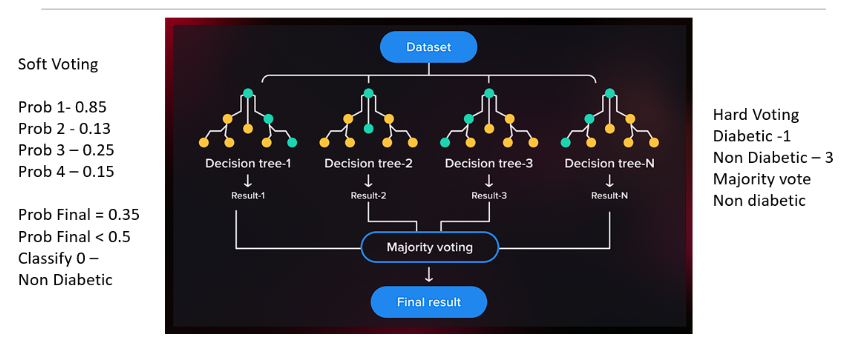

In [1]:
from warnings import filterwarnings
filterwarnings ('ignore')

### Step 1: Read the train dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Perfrom basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.duplicated().sum()

0

### Step 3: Separate X and Y (Survived)

In [6]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [9]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

#### 3(i) Plot bar chart for Y

<Axes: xlabel='Survived'>

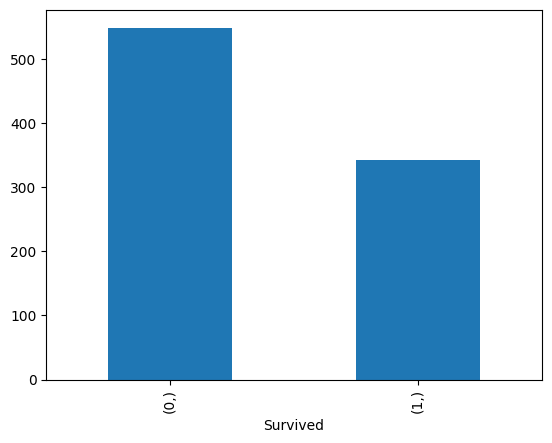

In [10]:
Y.value_counts().plot(kind='bar')

### Step 4: Seaparate Cat and Con for X

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Sex', 'Embarked']

In [13]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

### Step 5: Preprocess Data for X

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [16]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [17]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Step 6: Apply Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=21)

In [20]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
793,-1.566107,-0.104637,-0.474545,-0.473674,-0.030371,0.0,1.0,1.0,0.0,0.0
23,-1.566107,-0.104637,-0.474545,-0.473674,0.066360,0.0,1.0,0.0,0.0,1.0
97,-1.566107,-0.488887,-0.474545,0.767630,0.627278,0.0,1.0,1.0,0.0,0.0
9,-0.369365,-1.180535,0.432793,-0.473674,-0.042956,1.0,0.0,1.0,0.0,0.0
157,0.827377,0.049062,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [21]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [22]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
617,0.827377,-0.258337,0.432793,-0.473674,-0.324253,1.0,0.0,0.0,0.0,1.0
379,0.827377,-0.796286,-0.474545,-0.473674,-0.491874,0.0,1.0,0.0,0.0,1.0
725,0.827377,-0.719436,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
826,0.827377,-0.104637,-0.474545,-0.473674,0.489104,0.0,1.0,0.0,0.0,1.0
450,-0.369365,0.510161,0.432793,2.008933,-0.089684,0.0,1.0,0.0,0.0,1.0


In [23]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


In [24]:
xtrain.shape

(712, 10)

In [25]:
xtest.shape

(179, 10)

### Step 7: Model Buildng --> Random Forest Ensemble Technique

##### In this practise, we are predicting 'Survived' feature which is categorical.
##### RandomForest Classifier is used for this.
##### When we want to predict a continuous feature using this model, use RandomForestRegressor

In [26]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                max_depth=1,
                                min_samples_split=5,
                                min_samples_leaf=5,
                                criterion='entropy')
# we take random value for above parameters are they will be tuned in later steps
model1.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=1)

#### 7(i) Check accuracy

In [27]:
model1.score(xtrain, ytrain)

0.6474719101123596

In [28]:
model1.score(xtest, ytest)

0.5921787709497207

### Step 8: Hypertuning Tuning

##### RandomizedSearchCV is used for this model for tuning as it is much faster than GridSearchCV

In [29]:
params1 = {'n_estimators':[10, 50, 100, 200, 300],
           'max_depth':[2, 3, 4, 5],
           'min_samples_split':[5, 6, 7, 8],
           'criterion':['gini', 'entropy']}
# take only above parameters for tuning (no need to tune all paramaters) to run the model faster

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params1, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [31]:
rscv1.best_params_

{'n_estimators': 10,
 'min_samples_split': 5,
 'max_depth': 4,
 'criterion': 'gini'}

In [32]:
rscv1.best_score_
# this is same as cross validated r2 score

0.8027117936282167

In [33]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=10)

#### 8(i) Evaluate Randome Forest Model

In [34]:
best_rfc.score(xtrain, ytrain)

0.8497191011235955

In [35]:
best_rfc.score(xtest, ytest)

0.8212290502793296

### Step 9: Predict results for random forest

##### predicting train data just for comparision to check how the model is working when comapred to actual (train dataset)

In [36]:
ypred_train1 = best_rfc.predict(xtrain)
ypred_test1 = best_rfc.predict(xtest)

In [37]:
ypred_train1[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [38]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [39]:
ypred_test1[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [40]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


#### 9(i) Plot Confusion Matrix for random forest

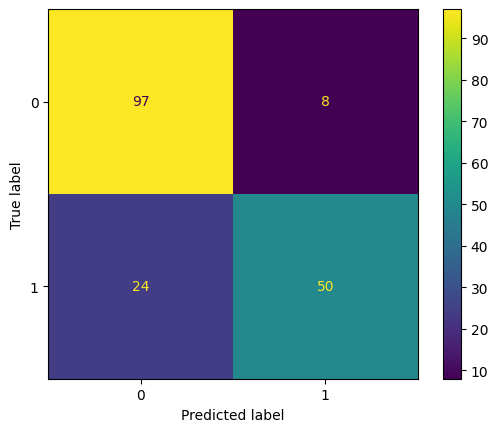

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf1 = confusion_matrix(ytest, ypred_test1)
cfd1 = ConfusionMatrixDisplay(cf1, display_labels=best_rfc.classes_)
cfd1.plot()

#### 9(ii) Print Classification Report for Random Forest

In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test1))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       105
           1       0.86      0.68      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.82      0.82       179



##### Above model is a good model as f1 score are ~> than 80%

## Gradient Boosting Model

#### Create Decision Tree consequentently rather than parallely (which is done in Random Forest)

### Step 1 to 6 --> same as performed for Random Forest

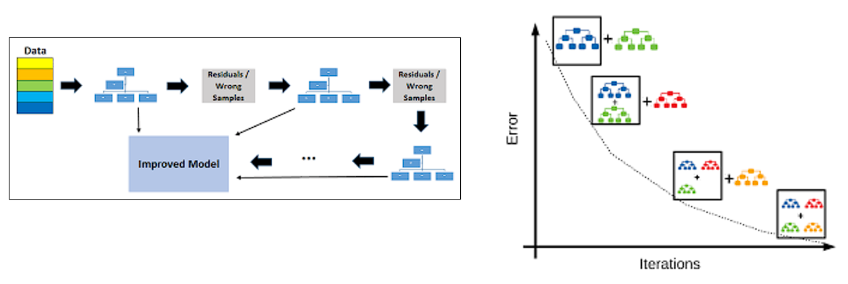

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate=0.1,
                                    n_estimators=1,
                                    max_depth=1,
                                    min_samples_split=5,
                                    min_samples_leaf=5)
# take only above parameters for tuning (no need to tune all paramaters) to run this model faster
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                           n_estimators=1)

In [44]:
model2.score(xtrain, ytrain)

0.6235955056179775

In [45]:
model2.score(xtest, ytest)

0.5865921787709497

### Step 8: Hypertuning Tuning

##### RandomizedSearchCV used it is faster than GridSearchCV

In [46]:
params2 = {'learning_rate':[0.01, 0.1, 0.15, 0.2],
           'n_estimators':[10, 50, 100, 200, 300],
           'max_depth':[2, 3, 4, 5],
           'min_samples_split':[5, 6, 7, 8, 9]}
# take only above parameters for tuning (no need to tune all paramaters) to run the model faster

In [47]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2, cv=5, scoring='f1_macro')
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [48]:
rscv2.best_params_

{'n_estimators': 300,
 'min_samples_split': 7,
 'max_depth': 3,
 'learning_rate': 0.01}

In [49]:
rscv2.best_score_

0.798075884343993

In [50]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.01, min_samples_split=7,
                           n_estimators=300)

#### 8(i) Evaluate Graident Boosting Classifier model

In [51]:
best_gbc.score(xtrain, ytrain)

0.8525280898876404

In [52]:
best_gbc.score(xtest, ytest)

0.8268156424581006

### Step 9: Predict results for Gradient Boosting

##### predicting train data just for comparision to check how the model is working when comapred to actual (train dataset)

In [53]:
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [54]:
ypred_train2[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [55]:
ytrain.head()

,Survived
793,0
23,1
97,1
9,1
157,0


In [56]:
ypred_test2[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [57]:
ytest.head()

,Survived
617,0
379,0
725,0
826,0
450,0


#### 9(i) Plot Confusion Matrix for Gradient Boosting

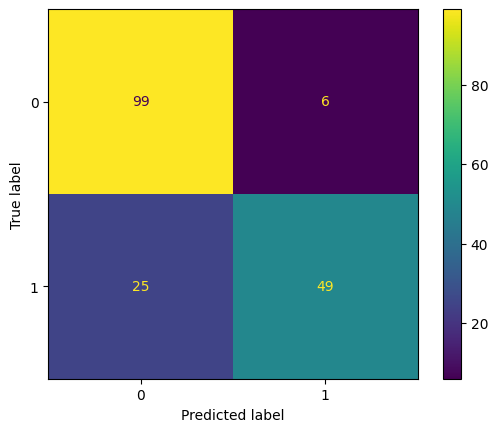

In [58]:
cf2 = confusion_matrix(ytest, ypred_test2)
cfd2 = ConfusionMatrixDisplay(cf2, display_labels=best_gbc.classes_)
cfd2.plot()

#### 9(ii) Print Classification Report for Gradient Boosting

In [59]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86       105
           1       0.89      0.66      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.84      0.83      0.82       179



### Conclusion --> Gradient Boosting is slightly better than Random Forest

##### Test f1-scores is 0.81 and crossvalidated f1 score is 0.8081

### Step 10: Predict Out of Sample data

#### Using Gradient Boosting model as it performed better than Random Forest

In [60]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [61]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

#### 10(i) Apply pre.transform i.e. preprocess xnew

In [62]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0


#### 10(ii) Get prediction with Gradient Boosting

In [63]:
preds = best_gbc.predict(xnew_pre)
preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [64]:
probs = best_gbc.predict_proba(xnew_pre)
probs[0:5]

array([[0.87257105, 0.12742895],
       [0.55235744, 0.44764256],
       [0.87205808, 0.12794192],
       [0.87119244, 0.12880756],
       [0.56426911, 0.43573089]])

In [65]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [66]:
prob_sur = probs[:,1]
prob_sur[0:5]

array([0.12742895, 0.44764256, 0.12794192, 0.12880756, 0.43573089])

### Step 11: Save above results to DataFrame

In [67]:
df_results = xnew[['PassengerId']]
df_results.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [68]:
df_results['Survived_pred'] = preds
df_results['Probability_Survival'] = prob_sur

In [69]:
df_results.head()

,PassengerId,Survived_pred,Probability_Survival
0,892,0,0.127429
1,893,0,0.447643
2,894,0,0.127942
3,895,0,0.128808
4,896,0,0.435731


#### 11(i) Plot prdicted values bar chart

In [70]:
df_results['Survived_pred'].value_counts()

Survived_pred
0    294
1    124
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

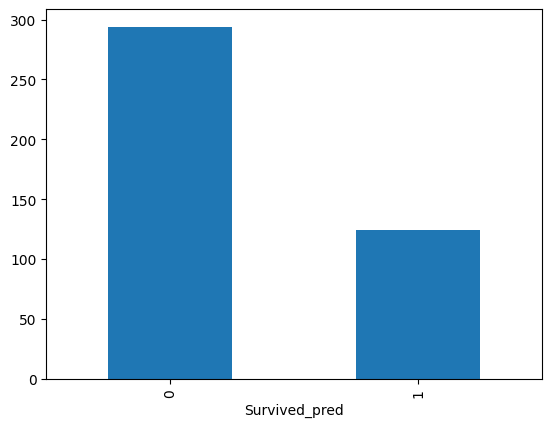

In [71]:
df_results['Survived_pred'].value_counts().plot(kind='bar')

### Step 12: Save above df to csv

In [72]:
df_results.to_csv('GradientResults.csv', index=False)

### Step 13: Push the files to git hub

##### Save the file first - File --> Save All

1. git add .
2. git commit -m "Class 21 - 17.03 - Ensemble Techniques - RandomForest and GradientBoosting"
3. git push -u origin main